In [1]:
import sys

sys.path.insert(1, '/rds/general/user/le322/home/synthPy/')



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches
import numpy as np
import pickle
from scipy import ndimage
import solver.rtm_solver as rtm
import utils.power_spectrum as util

import sys

sys.path.insert(1, '/rds/general/user/le322/home/synthPy')
import field_generator.gaussian2D as g3
import field_generator.gaussian2D as g2
import utils.power_spectrum as spectrum
import matplotlib.pyplot as plt
import numpy as np
import solver.minimal_solver as s

import matplotlib
import pandas as pd
plt.style.use("/rds/general/user/le322/home/synthPy/thesis.mplstyle")



/rds/general/user/le322/home/synthPy/solver/rtm_solver.py:133: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if axis is 'y':


**2D depth analysis**

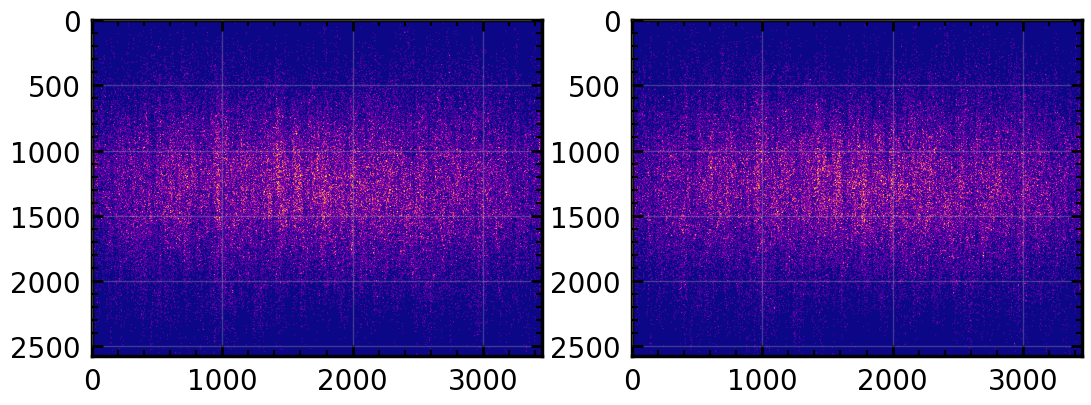

In [29]:
sh1 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/ray_test_1e6_refract.pkl", "rb"))
sh2 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/ray_test_1e7_refract.pkl", "rb"))
fig, ax = plt.subplots(1,2)
ax[0].imshow(sh1, clim = (0,0.02), cmap = 'plasma')

ax[1].imshow(sh2, clim = (0,0.02), cmap = 'plasma')
plt.show()


In [5]:
sh_025a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_0.25_rerun_shadow.pkl", "rb"))[1200:2001, 1200:2001]
sh_050a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_0.5_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_075a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_0.75_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_100a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.0_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_125a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.25_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_150a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.5_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_175a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.75_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_200a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_2.0_shadow.pkl", "rb"))[500:2001, 500:2001]

sh_025b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_0.25_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_050b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_0.5_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_075b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_0.75_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_100b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.0_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_125b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.25_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_150b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.5_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_175b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.75_shadow.pkl", "rb"))[500:2001, 500:2001]
sh_200b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_2.0_shadow.pkl", "rb"))[500:2001, 500:2001]

sh_15to3 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/15to3_power_shadow.pkl", "rb"))[1200:2001, 1200:2001]

sh_5_001 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/5_001_length_scale_shadow.pkl", "rb"))[800:2001, 800:2001]


re_025a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_0.25_rerun_refract.pkl", "rb"))
re_050a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_0.5_refract.pkl", "rb"))
re_075a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_0.75_refract.pkl", "rb"))
re_100a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.0_refract.pkl", "rb"))
re_125a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.25_refract.pkl", "rb"))
re_150a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.5_refract.pkl", "rb"))
re_175a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_1.75_refract.pkl", "rb"))
re_200a = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/256_2.0_refract.pkl", "rb"))

re_025b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/512_0.3_refract.pkl", "rb"))
re_050b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_0.5_refract.pkl", "rb"))
re_075b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_0.75_refract.pkl", "rb"))
re_100b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.0_refract.pkl", "rb"))
re_125b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.25_refract.pkl", "rb"))
re_150b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.5_refract.pkl", "rb"))
re_175b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_1.75_refract.pkl", "rb"))
re_200b = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/512_2.0_refract.pkl", "rb"))

re_15to3 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/15to3_power_shadow.pkl", "rb"))

re_5_001 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/depth_test/5_001_length_scale_refract.pkl", "rb"))

# Create a dictionary to store the data
data = {
    'extent': [],
    'resolution': [],
    'shadow': [],
    're': []
}

# Populate the dictionary with the data
for extent, resolution, shadow, refract in [
    (0.25, 256, sh_025a, re_025a), (0.5, 256, sh_050a, re_050a), (0.75, 256, sh_075a, re_075a), 
    (1.0, 256, sh_100a, re_100a), (1.25, 256, sh_125a, re_125a), (1.5, 256, sh_150a, re_150a), 
    (1.75, 256, sh_175a, re_175a), (2.0, 256, sh_200a, re_200a),
    (0.25, 512, sh_025b, re_025b), (0.5, 512, sh_050b, re_050b), (0.75, 512, sh_075b, re_075b), 
    (1.0, 512, sh_100b, re_100b), (1.25, 512, sh_125b, re_125b), (1.5, 512, sh_150b, re_150b), 
    (1.75, 512, sh_175b, re_175b), (2.0, 512, sh_200b, re_200b)
]:
    data['extent'].append(extent)
    data['resolution'].append(resolution)
    data['shadow'].append(shadow)
    data['re'].append(refract)

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)



def pixely_to_mm(x):
    factor = 10 / 2574
    return x * factor

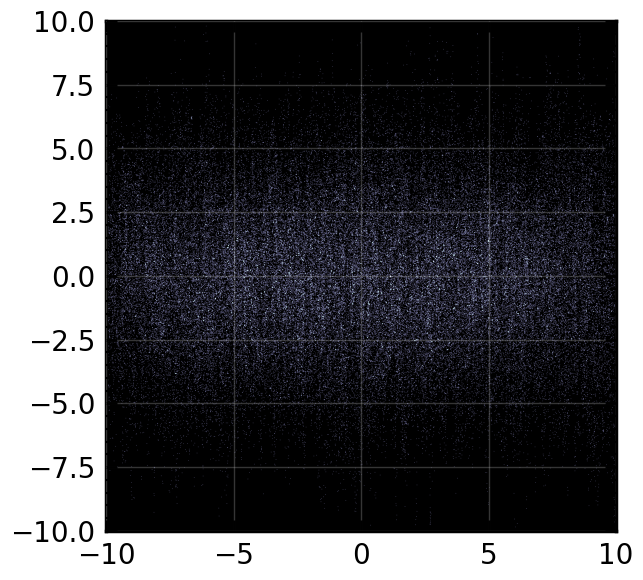

In [64]:
plt.imshow(re_075b, cmap = "bone", clim = [0,10], extent = (-10,10,-10,10))

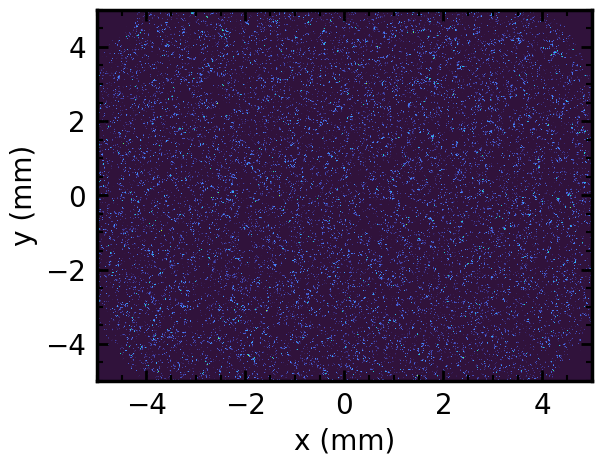

In [147]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sh = pickle.load(open("/rds/general/user/le322/home/synthPy/output/power_spec/0503_shadow.pkl", "rb"))
# electron density - heatmap
fig, ax = plt.subplots(figsize=(6, 6))
im1 = ax.imshow(sh, clim = [1,10], extent = (-5,5,-5,5), aspect = 13.5/18, cmap = 'turbo')

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.grid(False)
ax.set_yticks([-4,-2,0,2,4])
ax.set_xticks([-4,-2,0,2,4])

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')

# ax.text(-8.9, -8.9, str(tframe[n]) + 'ns', color='w', fontsize=18)

# axins1 = inset_axes(
#     ax,
#     width="5%",  # width: 50% of parent_bbox width
#     height="40%",  # height: 5%
#     loc="center right",
#     bbox_to_anchor=(0.08, 0., 1, 1),
#     bbox_transform=ax.transAxes,
#     borderpad=0,
# )

axins1.xaxis.set_ticks_position("bottom")
# cbar       =  plt.colorbar(im1, cax=axins1, ticks=[1e-5, 1e-3, 1e-1, 10], shrink=0.2, orientation="vertical", extend='both'
# cbar.ax.set_yticklabels([r'$10^{-5}$', '$10^{-3}$', '$10^{-1}$', '10']) 
# cbar.set_label(r'$\rho$ (gr cm$^{-2}$)', fontsize=20, rotation = 270, labelpad = 35)
# cbar.ax.tick_params(labelsize = 16, width = 2)
# cbar.ax.grid(False)

# plt.savefig('/rds/general/user/le322/home/synthPy/analysis/shadow_0.05.png', dpi = 400)
plt.show()

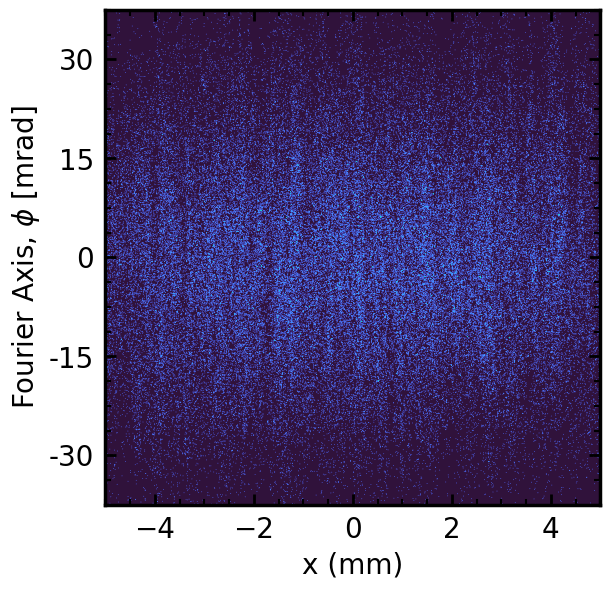

In [160]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
re1 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/length_scale/1.5_0.1/2.0refract.pkl", "rb"))
re2 = 
pixel_size = (13.5/re_075b.shape[0])
scale_phi   =   1/(2 * pixel_size/400 * 1000)#

aspect = scale_phi / scale_sh_x
# electron density - heatmap
fig, ax = plt.subplots(figsize=(6, 6))
im1 = ax.imshow(re, clim = [0,20], extent = (-5,5,-5,5), cmap = 'turbo')

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.grid(False)
ax.set_yticks([-4,-2,0,2,4])
ax.set_xticks([-4,-2,0,2,4])
ax.set_yticklabels([-30, -15, 0, 15, 30])

ax.set_xlabel('x (mm)')
ax.set_ylabel('Fourier Axis, $\phi$ [mrad]')

# ax.text(-8.9, -8.9, str(tframe[n]) + 'ns', color='w', fontsize=18)

# axins1 = inset_axes(
#     ax,
#     width="5%",  # width: 50% of parent_bbox width
#     height="40%",  # height: 5%
#     loc="center right",
#     bbox_to_anchor=(0.08, 0., 1, 1),
#     bbox_transform=ax.transAxes,
#     borderpad=0,
# )

axins1.xaxis.set_ticks_position("bottom")
# cbar       =  plt.colorbar(im1, cax=axins1, ticks=[1e-5, 1e-3, 1e-1, 10], shrink=0.2, orientation="vertical", extend='both'
# cbar.ax.set_yticklabels([r'$10^{-5}$', '$10^{-3}$', '$10^{-1}$', '10']) 
# cbar.set_label(r'$\rho$ (gr cm$^{-2}$)', fontsize=20, rotation = 270, labelpad = 35)
# cbar.ax.tick_params(labelsize = 16, width = 2)
# cbar.ax.grid(False)
plt.savefig('/rds/general/user/le322/home/synthPy/analysis/refract_0.75.png', dpi = 400)

In [5]:
shadows = df.query('resolution == 256').shadow

extents = df.query('resolution == 256').extent

df.iloc[8].extent


0.25

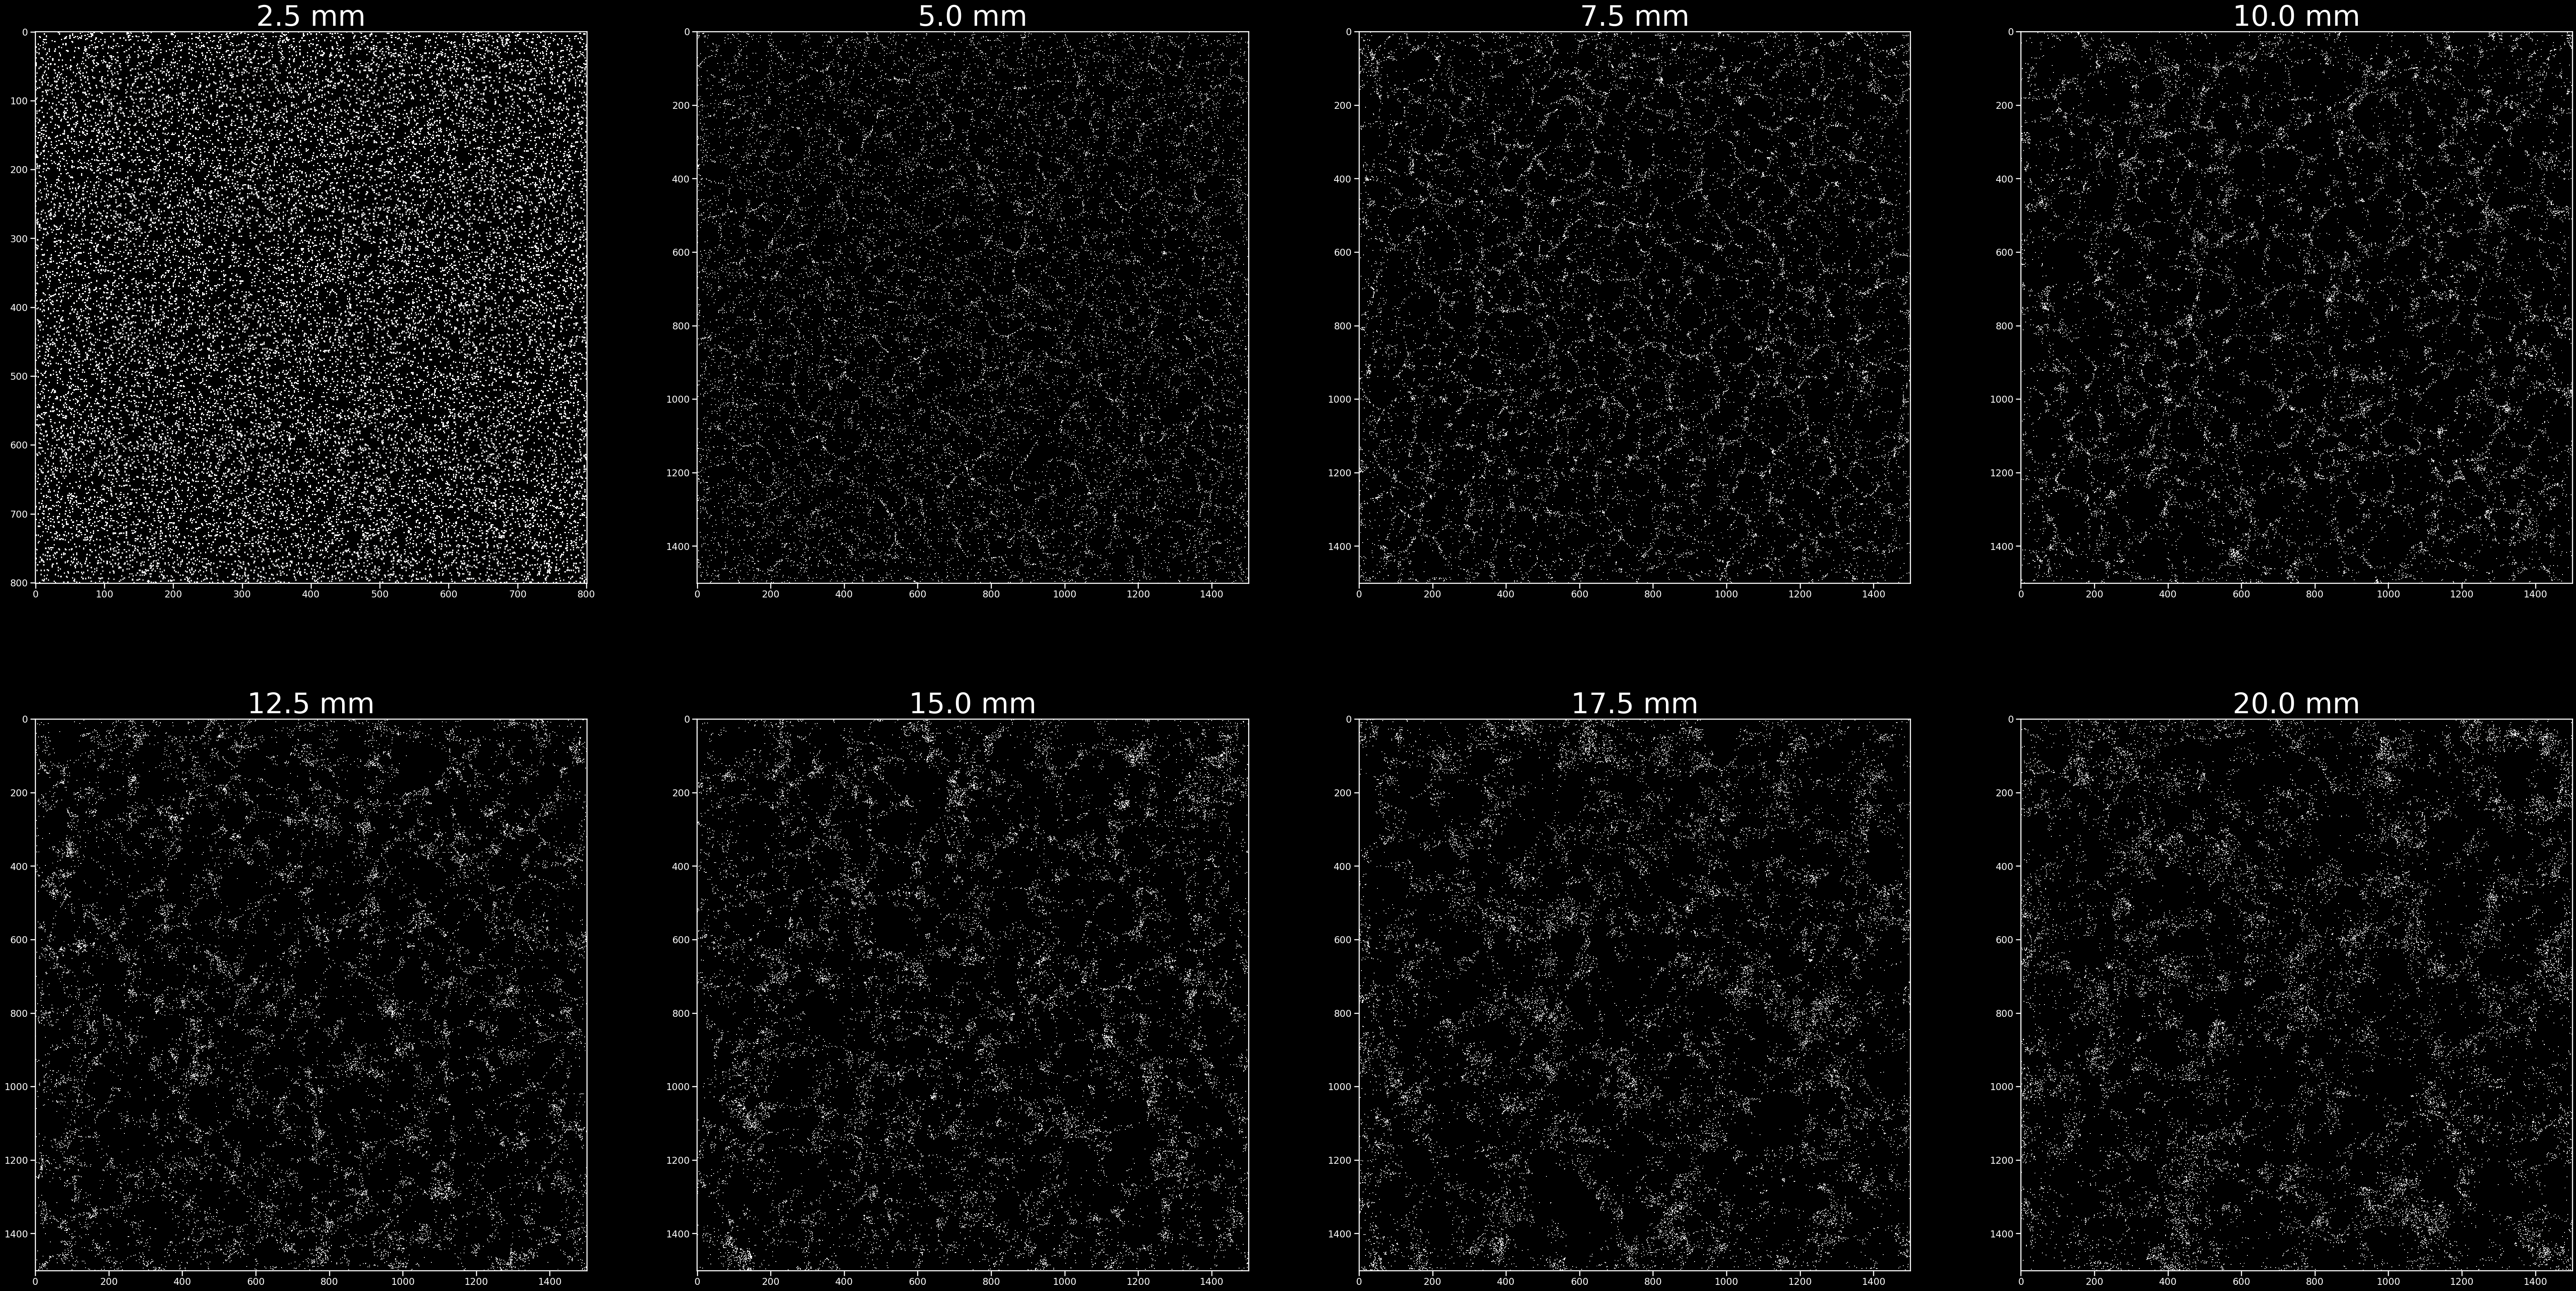

In [130]:
from matplotlib.colors import LinearSegmentedColormap

fig, axs = plt.subplots(2,4, figsize = (80,40))

cdict1 = {
    'red': (
        (0.0, 0.0, 0.0),
        (0.5, 0.0, 0.0),
        (1.0, 1.0, 1.0),
    ),
    'green': (
        (0.0, 0.0, 0.0),
        (1.0, 1.0,1.0),
    ),
    'blue': (
        (0.0, 0.0, 0.0),
        (0.0, 0.0, 0.0),
        (1.0, 1.0, 1.0),
    )
}
green = LinearSegmentedColormap('green', cdict1)

axes_list = []
for ax in axs.flatten():
    axes_list.append(ax)


for i, n in enumerate(shadows):
    axes_list[i].imshow(n, clim = (0,0.01), cmap = 'bone')
    axes_list[i].set_title(f'{extents[i] * 10} mm', fontsize = 50)
plt.show()


Eventually find the plots of electron distribution, seen in MPI_job

Plot graphs - 0.1, 2.5, 5/3

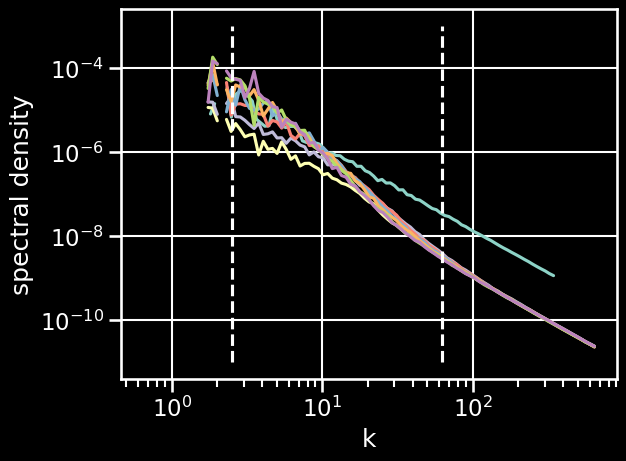

<Figure size 1000x1000 with 0 Axes>

In [232]:




l_max = 2.5
l_min = 0.1
for index, row in df[df['resolution'] ==  256].iterrows():
    ne = df.shadow[index]
    _, wn, ps = spectrum.radial_2Dspectrum(ne, 10,10, smooth = False)
    plt.plot(wn, ps/wn**2, label = df.iloc[index].extent)
    # max_wn = wn[np.where(ps == np.nanmax(ps))]
    # plt.vlines(max_wn, 1e-1, 1e-7)
    # print(max_wn)


plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 1e-11, 1e-3, linestyle = 'dashed', label = '$k_{min}, k_{max}$')


# plt.plot(wn, 2*k42(wn))


plt.grid()
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.xlabel('k')
plt.ylabel('spectral density')
# plt.ylim(1e-4, 1e-1)
# plt.xlim(1, 150)
# plt.plot(wn, 10**(-3.5) * wn**(-8/3), label = 'Gradient = -8/3')
# plt.legend(loc = 'upper right')
plt.figure(figsize=(10, 10))
plt.show()

In [88]:
re = df.query('resolution == 512').re


NameError: name 'extents' is not defined

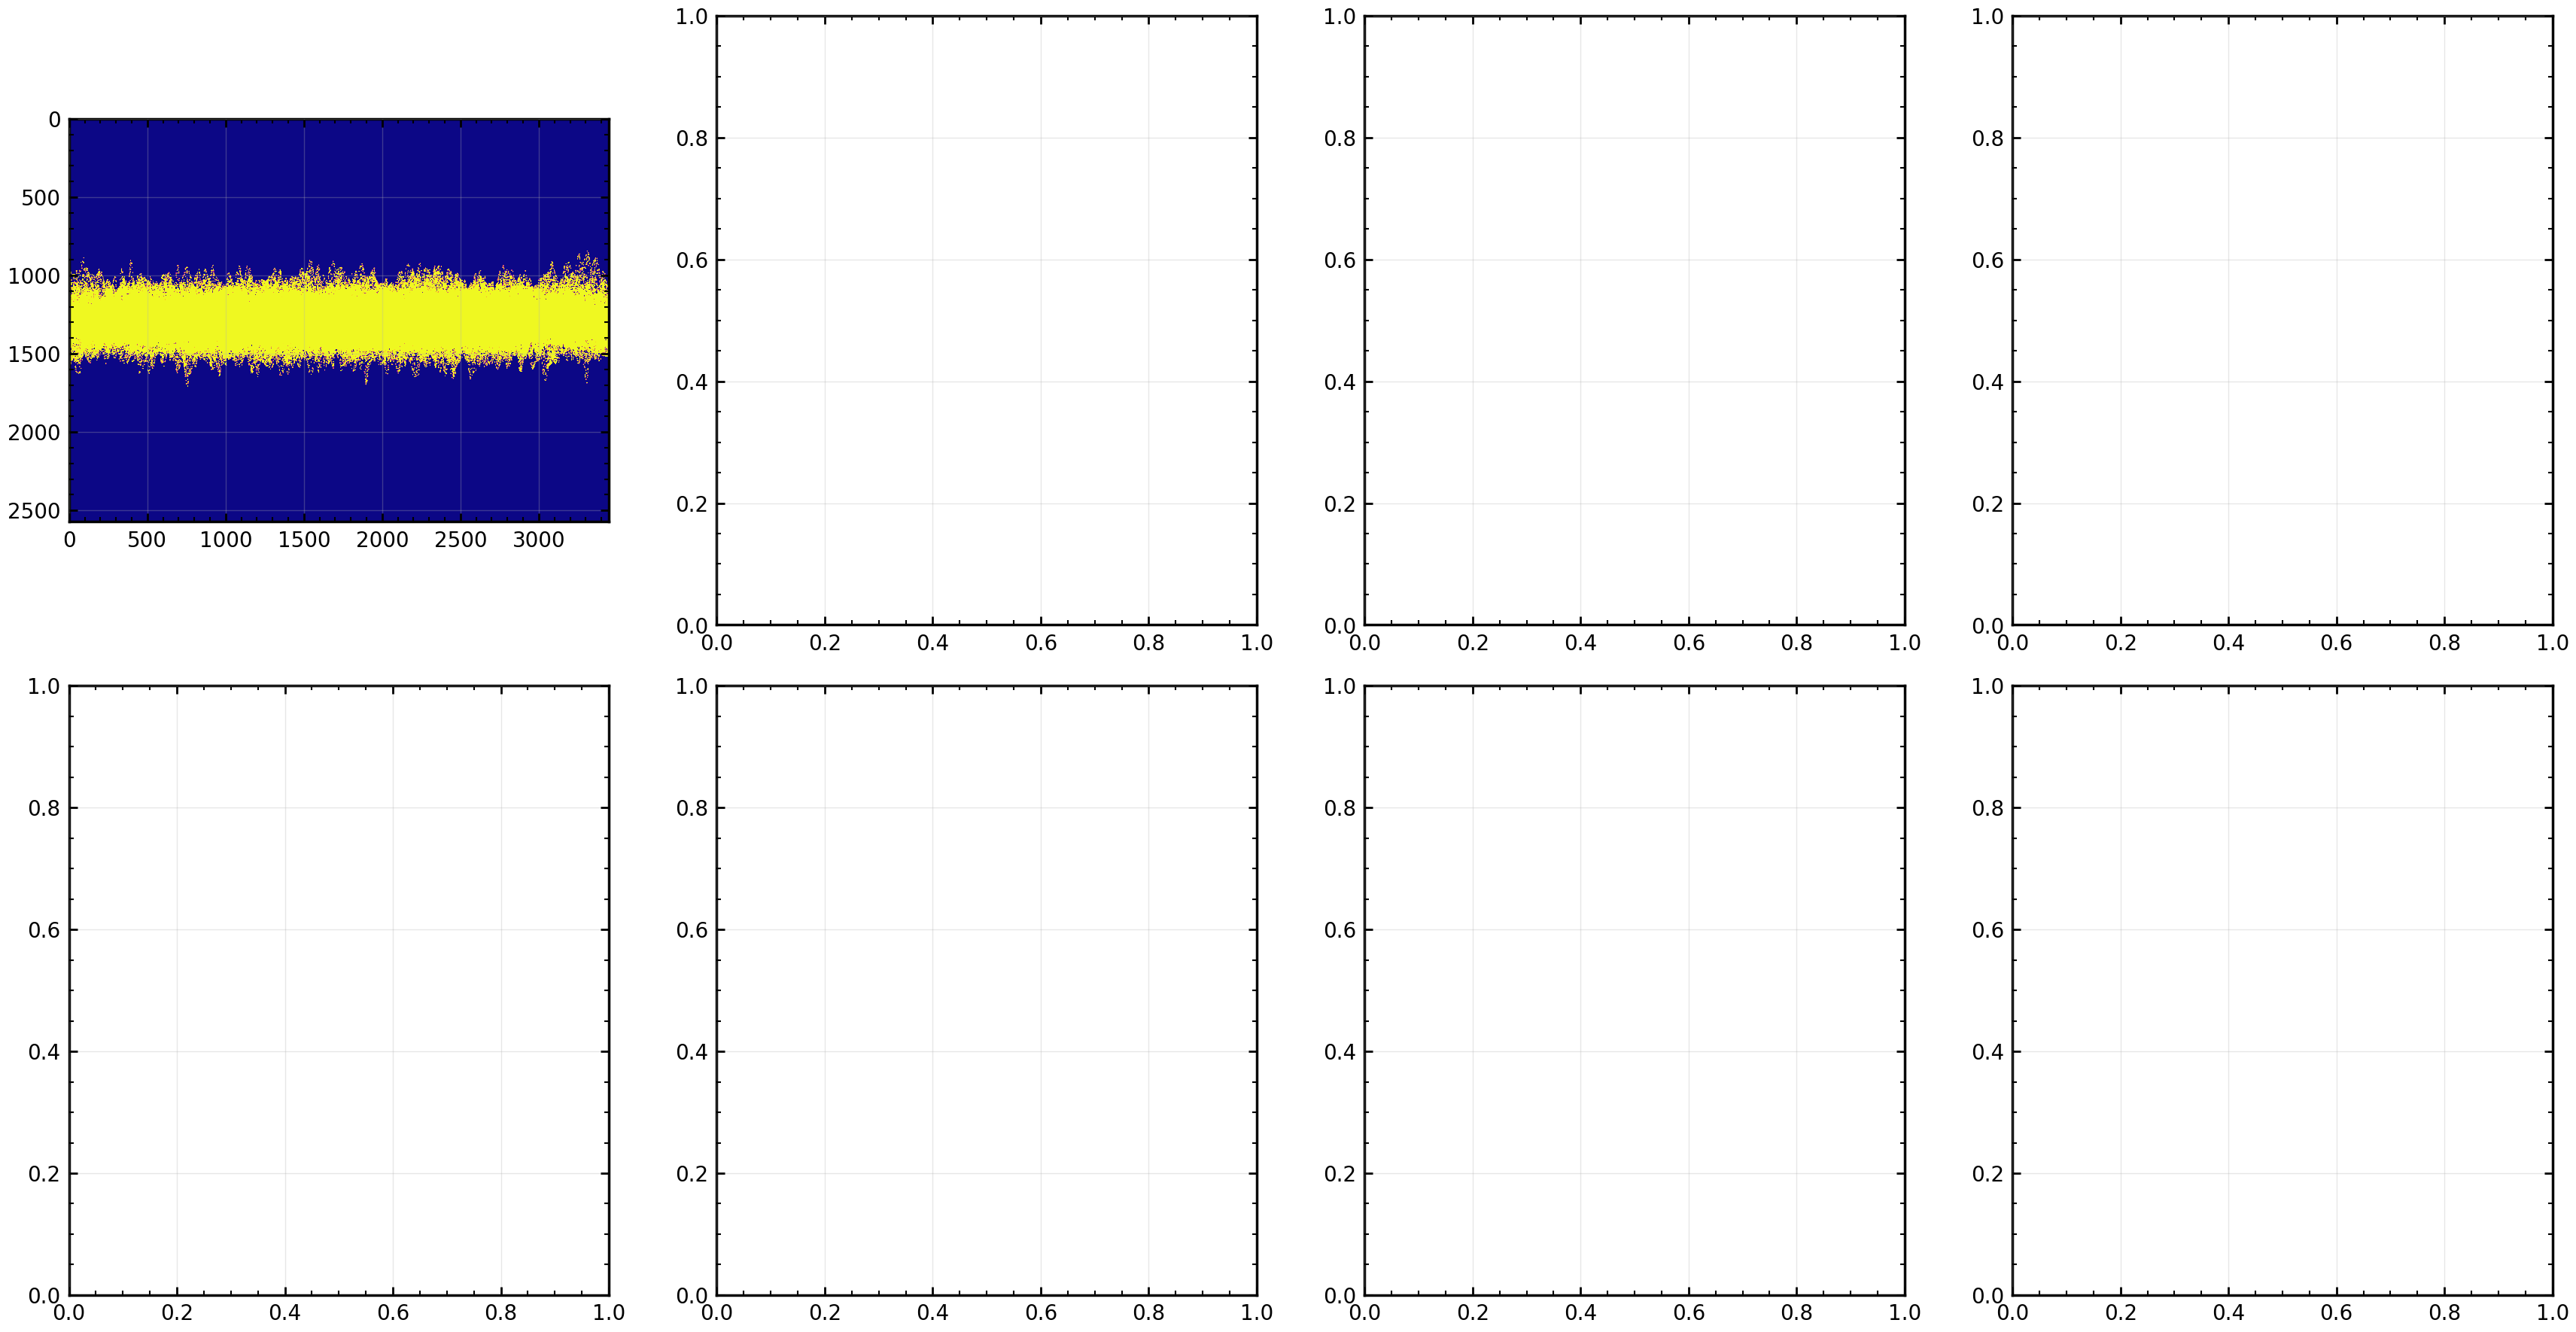

In [89]:
fig, axs = plt.subplots(2,4, figsize = (40,20))

axes_list = []
for ax in axs.flatten():
    axes_list.append(ax)


for i, n in enumerate(re):
    axes_list[i].imshow(n, cmap = 'plasma', clim = (0,5))
    axes_list[i].set_title(f'{extents[i] * 10} mm')
plt.show()


In [168]:

from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als_optimized(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2, 1],[0,-1,-2], shape=(L, L-2))
    D = lam * D.dot(D.transpose()) # Precompute this term since it does not depend on `w`
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    for i in range(niter):
        W.setdiag(w) # Do not create a new matrix, just update diagonal values
        Z = W + D
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

def clean(sig_corr):
    # baseline          =   baseline_als_optimized(sig, 4e10, 1e-3)
    sig_norm       =   (sig_corr - sig_corr.min()) / (sig_corr.max() + sig_corr.min())

    return sig_norm

x = np.linspace(-35,35, df.re[0].shape[0])
totals = []
re1 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/length_scale/1.5_0.1/2.0refract.pkl", "rb"))
re2 = pickle.load(open("/rds/general/user/le322/home/synthPy/output/length_scale/1.5_0.1/0.4refract.pkl", "rb"))
for i, r1 in enumerate(np.array([re1, re2])):
    total = np.zeros(r1.shape[0])
    for j in range(len(r1[:,0]) - 1):
        total[j] += np.sum(r1[j,:])

    totals.append(clean(total))








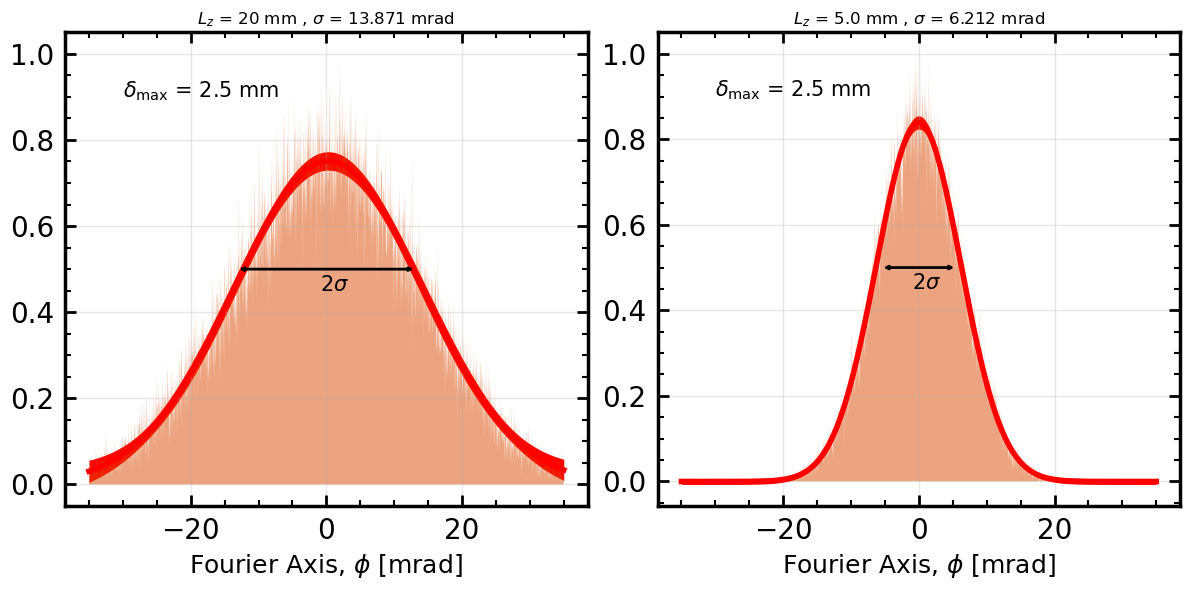

In [169]:
from lmfit.models import GaussianModel, ConstantModel



c1 = '#1C6758'   # dark green
c2 = '#006e23'   # ciano
c3 = '#6e0052'   # violet
c4 = '#db4900'   # purple
c5 = '#37e67d'   #light green

fig, axes = plt.subplots(1,2, figsize = (12,6))
ax = axes.flatten()
stds = []
chis = []
extents = [2, 0.5]
for i, total in enumerate(totals):
    # ax1.plot(x, total1, lw=1.5, alpha = 15 / 15, zorder=2)
    # ax2.plot(x, total2, lw=1.5, alpha = 15 / 15, zorder=2)

    mod               =   GaussianModel() + ConstantModel()
    mod.make_params()
    mod.set_param_hint('sigma', value=2)
    mod.set_param_hint('amplitude', value=1)
    res1 = mod.fit(total, x = x, nan_policy='omit')

    ax[i].plot(x, res1.best_fit, color='red', linewidth=4.0, zorder = 4)


    nstd     = 8 # to draw 5-sigma intervals
    error_up = res1.best_fit + nstd * res1.eval_uncertainty()
    error_dw = res1.best_fit - nstd * res1.eval_uncertainty()

    ax[i].fill_between(x, 
                    error_up,
                    error_dw, 
                    color='red', alpha=1,  edgecolor='b', lw = 0)

    ax[i].fill_between(x, total, facecolor = c4, alpha=0.5, zorder = 2, lw = 0.1)



    sigma1 = res1.best_values['sigma']


    stds.append(sigma1)

for i, a in enumerate(ax):
#     a.grid()
    a.set_xlabel(r'Fourier Axis, $\phi$ [mrad]',fontsize = 18)
    a.set_title(f'$L_z$ = {extents[i] * 10} mm , $\sigma$ = {np.round(stds[i],3 )} mrad')
    a.spines[['top', 'right']].set_visible(True)
    con  = patches.ConnectionPatch((-stds[i]+res1.best_values['center'], 0.5), (+stds[i]-res1.best_values['center'],  0.5), coordsA = 'data', coordsB = 'data',
                      arrowstyle="<->", shrinkA=5, shrinkB=5,
                      mutation_scale = 5, lw = 2, color = 'black', zorder = 5)
    a.annotate(r'$\delta_{\text{max}}$ = 2.5 mm', (-30, 0.9), fontsize = 15)

    a.add_artist(con)
    a.annotate('2$\sigma$', (-1, 0.45), fontsize = 15)
plt.tight_layout()

plt.savefig('/rds/general/user/le322/home/synthPy/analysis/gaussian.png' , dpi = 600)




FIND LENGTH SCALE

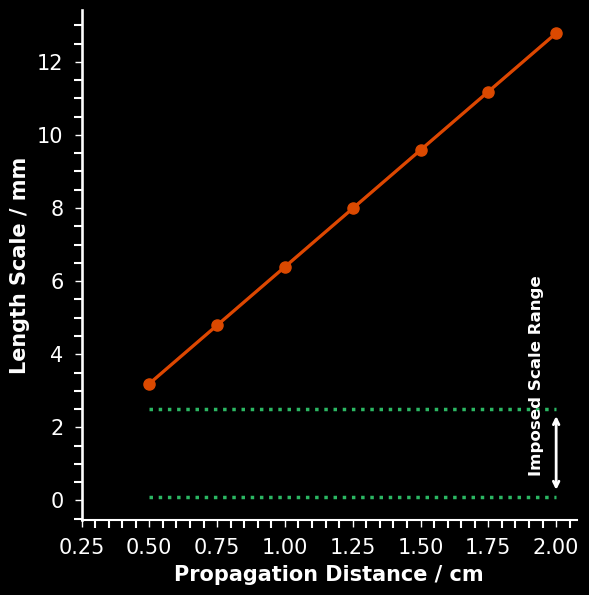

In [170]:
import seaborn as sns
from matplotlib import patches

def find_lz(sigma, epsilon = 1):
    ne = 1e25

    L_z = np.array([5,7.5,10,12.5,15,17.5, 20])
    lwl = 1053e-9
    c = 3e8
    omega = 2*np.pi*(c/lwl)
    nc = 3.142e-4 * omega**2
    
    sigma *= 1e-3

    return ((ne**2)/(4*nc**2*sigma**2))*L_z*1e-3


sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

lengths = df.extent[1:8]
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(lengths, find_lz(np.array(stds[1:]))*1e3, '-o', markersize = 8, color = c4)
ax.plot(lengths, find_lz(np.array(stds[1:]))*1e3, markersize = 8, color = 'red', alpha = 0.5, zorder = 1)


plt.hlines([0.1, 2.5], 0.5, 2, zorder = 1, ls= ':', color = c5, lw = 2.5, alpha = 0.8)
# plt.plot(np.log)
# plt.grid()
ax.set_ylabel('Length Scale / mm', fontsize = 15, weight = 'bold')
ax.set_xlabel('Propagation Distance / cm', fontsize = 15, weight = 'bold')

ax.spines[['right', 'top']].set_visible(False)
# plt.plot(lengths, stds[1:], 'x')
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, width = 1, size = 5)
ax.set_xticks([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0])
for axis in ['top', 'bottom']:
    ax.spines[axis].set_linewidth(1.5)
con = patches.ConnectionPatch((2, 0.1), (2, 2.5), coordsA = 'data', coordsB = 'data', arrowstyle = "<->", shrinkA = 5, shrinkB = 5, mutation_scale = 10, lw = 2, color = 'white', zorder = 5)
ax.add_artist(con)
ax.annotate(r'Imposed Scale Range', (1.9, 0.75), rotation = 90, fontsize = 12, weight = 'bold')
plt.savefig('length_scale.png', dpi = 400)

plt.show()
